# Data Import and Cleaning

In [1]:
# import libraries and read in the excel file
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("default of credit card clients.xls")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [2]:
# Want to see if there are any nulls and what each column contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [3]:
# Getting simple stats of the data
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
# Look at our columns again, so we can change them
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
# Drop the unnamed column
df = df.drop(columns=["Unnamed: 0"])

In [6]:
# Change our coulumn names
df = df.rename(columns={
    "X1": "credit_limit",
    "X2": "gender",
    "X3": "education",
    "X4": "marital_status",
    "X5": "age",

    "X6": "pay_sep",
    "X7": "pay_aug",
    "X8": "pay_jul",
    "X9": "pay_jun",
    "X10": "pay_may",
    "X11": "pay_apr",

    "X12": "bill_sep",
    "X13": "bill_aug",
    "X14": "bill_jul",
    "X15": "bill_jun",
    "X16": "bill_may",
    "X17": "bill_apr",

    "X18": "paid_sep",
    "X19": "paid_aug",
    "X20": "paid_jul",
    "X21": "paid_jun",
    "X22": "paid_may",
    "X23": "paid_apr",

    "Y": "default"
})

In [7]:
# Make sure it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit_limit    30001 non-null  object
 1   gender          30001 non-null  object
 2   education       30001 non-null  object
 3   marital_status  30001 non-null  object
 4   age             30001 non-null  object
 5   pay_sep         30001 non-null  object
 6   pay_aug         30001 non-null  object
 7   pay_jul         30001 non-null  object
 8   pay_jun         30001 non-null  object
 9   pay_may         30001 non-null  object
 10  pay_apr         30001 non-null  object
 11  bill_sep        30001 non-null  object
 12  bill_aug        30001 non-null  object
 13  bill_jul        30001 non-null  object
 14  bill_jun        30001 non-null  object
 15  bill_may        30001 non-null  object
 16  bill_apr        30001 non-null  object
 17  paid_sep        30001 non-null  object
 18  paid_a

In [8]:
# Get the possible values of the default column and see the frequency of them
# We can now see that there is an unwanted row
df["default"].value_counts(normalize=True)

default
0                             0.778774
1                             0.221193
default payment next month    0.000033
Name: proportion, dtype: float64

In [9]:
# Find the row to make sure it is a constant problem and the right row
df[df["default"].astype(str).str.contains("default", case=False)]

,credit_limit,gender,education,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [10]:
# Drop the row and set the column as a numeric
df = df[df["default"].isin([0, 1])]
df["default"] = df["default"].astype(int)

In [11]:
# recheck the distribution to make sure it worked
df["default"].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [12]:
# See that the row is deleted
df

,credit_limit,gender,education,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,...,bill_jun,bill_may,bill_apr,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apr,default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
# I want to group the columns for our model later on so that we can get more insight into what type of features really matter
behavior_features = [
    "pay_sep", "pay_aug", "pay_jul", "pay_may", "pay_apr",
    "bill_sep", "bill_aug", "bill_jul", "bill_jun", "bill_may", "bill_apr",
    "paid_sep", "paid_aug", "paid_jul", "paid_jun", "paid_may", "paid_apr"
]

capacity_features = [
    "credit_limit",
    "age"
]

demographic_features = [
    "gender",
    "education",
    "marital_status"
]

## Exploratory Data Analysis (EDA)

This section explores target balance, feature distributions, and relationships to default.
EDA is used to validate data quality and identify signal before modeling.

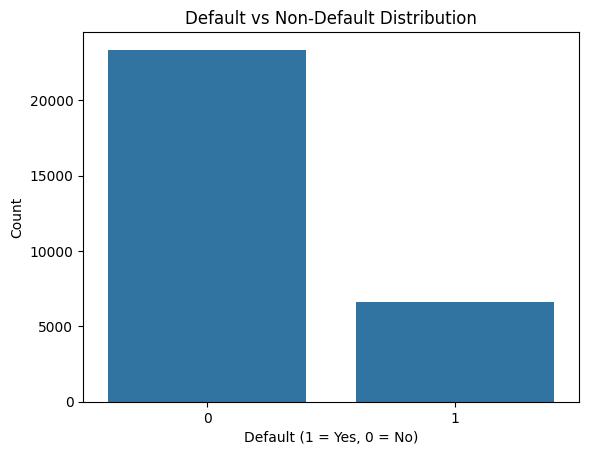

In [14]:
# Look at the distributioin of defaults and non-defaults
sns.countplot(x="default", data=df)
plt.title("Default vs Non-Default Distribution")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

### EDA Summary

- Default rate is moderately imbalanced (~22%), justifying class-weighted models.
- Several financial features show clear distributional differences between defaulters and non-defaulters.
- Feature correlations suggest non-linear relationships, motivating tree-based models.
- Predicted probabilities show good spread, supporting percentile-based risk banding.


# Logistic Regression

In [15]:
# Define what our target variable is and our predictors
X = df[behavior_features + capacity_features + demographic_features]
y = df["default"]

In [16]:
# Train our data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [17]:
# Scale the data based on our predictor variables
scale_features = [
    "credit_limit", "age",
    "bill_sep", "bill_aug", "bill_jul", "bill_jun", "bill_may", "bill_apr",
    "paid_sep", "paid_aug", "paid_jul", "paid_jun", "paid_may", "paid_apr"
]

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_features] = scaler.fit_transform(X_train[scale_features])
X_test_scaled[scale_features] = scaler.transform(X_test[scale_features])

In [18]:
# Run our logistic regression and make it balanced because the default column was only true 22% of the time

log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [19]:
# Get the predictions in probability format so that we get the risk for each applicant
# Get our AUC score for the model 
y_pred_prob = log_model.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, y_pred_prob)

0.7164013527454849

An AUC score of 0.72 indicates my model has fair or acceptable discriminatory ability, meaning it's better than random guessing (0.5) but not excellent, suggesting a 72% probability it can distinguish a random positive case from a random negative one.

In [20]:
# I am taking the X_test that we got when we trained the data, copying it, and then turning it into a dataframe called results
# I am then making arrays of the y_test and the y_pred_prob  within the results
# This attaches the predictions to the test set
results = X_test.copy()
results["actual_default"] = y_test.values
results["default_prob"] = y_pred_prob

In [21]:
# I got a pretty good AUC score, so I want to move on to categorizing the risks of the people into Low, Medium, and High risk based on thier variables
# I want to have risk groups or bands that can tell whether the loan is low risk, medium risk, or high risk based on the percentile the default probability is in the dataset
results["risk_band"] = pd.qcut(
    results["default_prob"],
    q=[0, 0.3, 0.7, 1],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

In [22]:
# Get a summary of the default rate by the bands we created
results.groupby("risk_band")["actual_default"].mean()

/var/folders/sn/16t8g_2d0ml3r257zrrn1k2m0000gn/T/ipykernel_41552/1397559019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results.groupby("risk_band")["actual_default"].mean()


risk_band
Low Risk       0.123556
Medium Risk    0.141333
High Risk      0.425333
Name: actual_default, dtype: float64

In [23]:
# Check the volume
results["risk_band"].value_counts(normalize=True)

risk_band
Medium Risk    0.4
Low Risk       0.3
High Risk      0.3
Name: proportion, dtype: float64

Using percentile-based risk bands creates a balanced approval policy. The Low Risk group shows a substantially lower default rate, while the High Risk group concentrates a large share of defaults, indicating effective risk segmentation.

In [24]:
# I need to make a profit array that calculates the profit per borrower based on the actual default column
# I then create a summary table that tells us how much we are gonna profit on average based off the risk band
results["profit"] = np.where(
    results["actual_default"] == 1,
    -5000,
    1000
)
results.groupby("risk_band")["profit"].mean()

/var/folders/sn/16t8g_2d0ml3r257zrrn1k2m0000gn/T/ipykernel_41552/1605992384.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results.groupby("risk_band")["profit"].mean()


risk_band
Low Risk        258.666667
Medium Risk     152.000000
High Risk     -1552.000000
Name: profit, dtype: float64

# XGBoost Model

Now that we have had success with a logistic regression, I want to try an XGBoost model to see if I can get a better result. 

In [25]:
# We need to make all of the columns into numeric values so that they are all able to be run in the model
feature_cols = behavior_features + capacity_features + demographic_features

X_train_num = X_train.copy()
X_test_num = X_test.copy()

X_train_num[feature_cols] = X_train_num[feature_cols].apply(pd.to_numeric, errors="coerce")
X_test_num[feature_cols] = X_test_num[feature_cols].apply(pd.to_numeric, errors="coerce")


In [26]:
# no nulls
X_train_num[feature_cols].isnull().sum().sort_values(ascending=False).head(10)

pay_sep         0
pay_aug         0
education       0
gender          0
age             0
credit_limit    0
paid_apr        0
paid_may        0
paid_jun        0
paid_jul        0
dtype: int64

In [27]:
y_train_num = y_train
y_test_num = y_test

In [28]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

xgb_model.fit(X_train_num, y_train_num)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
# Get the AUC score
y_pred_prob_xgb = xgb_model.predict_proba(X_test_num)[:, 1]
roc_auc_score(y_test_num, y_pred_prob_xgb)

0.7803783381985484

In [30]:
# Rebuild the risk bands
results_xgb = X_test_num.copy()
results_xgb["actual_default"] = y_test_num.values
results_xgb["default_prob"] = y_pred_prob_xgb

results_xgb["risk_band"] = pd.qcut(
    results_xgb["default_prob"],
    q=[0, 0.3, 0.7, 1],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

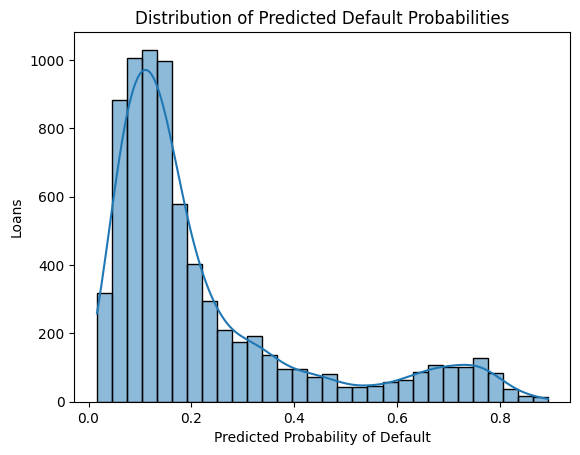

In [31]:
sns.histplot(results_xgb["default_prob"], bins=30, kde=True)
plt.title("Distribution of Predicted Default Probabilities")
plt.xlabel("Predicted Probability of Default")
plt.ylabel("Loans")
plt.show()

In [32]:
results_xgb.groupby("risk_band")["actual_default"].mean()

/var/folders/sn/16t8g_2d0ml3r257zrrn1k2m0000gn/T/ipykernel_41552/406419658.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_xgb.groupby("risk_band")["actual_default"].mean()


risk_band
Low Risk       0.068444
Medium Risk    0.152667
High Risk      0.465333
Name: actual_default, dtype: float64

In [33]:
results_xgb["risk_band"].value_counts(normalize=True)

risk_band
Medium Risk    0.4
Low Risk       0.3
High Risk      0.3
Name: proportion, dtype: float64

In [34]:
results_xgb["profit"] = np.where(
    results_xgb["actual_default"] == 1,
    -5000,
    1000
)

results_xgb.groupby("risk_band")["profit"].mean()


/var/folders/sn/16t8g_2d0ml3r257zrrn1k2m0000gn/T/ipykernel_41552/538988647.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_xgb.groupby("risk_band")["profit"].mean()


risk_band
Low Risk        589.333333
Medium Risk      84.000000
High Risk     -1792.000000
Name: profit, dtype: float64

# Final decision

Approval decisions are based on XGBoost-predicted default probabilities segmented into percentile-based risk bands. The model improves risk separation relative to logistic regression, leading to higher expected profitability under the same approval policy.

In [35]:
results_xgb.to_csv("credit_risk_results.csv", index=False)